<a href="https://colab.research.google.com/github/soyoon-0118/2025-1-myclass-BDA/blob/main/inclass/05w_B_wed_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05주차 수업

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                   'score':[5,4,3,4,None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df_raw = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                   'score':[5,4,3,4,None]})
df_raw

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [5]:
df_raw.rename(columns={'var2':'v2'},inplace=True)
df_raw

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [6]:
df_raw.rename(index={0 :'w',1:'y',2:'z'},inplace=True)
df_raw

,sex,score
w,M,5.0
y,F,4.0
z,NaN,3.0
3,M,4.0
4,F,NaN


##파생변수 생성

In [7]:
df = pd.DataFrame({'var1':[4,3,8],
                   'var2':[2,6,1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [8]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [12]:
df1['var_sum']=df1['var1'] = df1['var2']
df1

,var1,var2,var_sum
0,2,2,2
1,6,6,6
2,1,1,1


In [13]:
df1['var_sum']=df1['var1'] + df1['var2'] /2
df1

,var1,var2,var_sum
0,2,2,3.0
1,6,6,9.0
2,1,1,1.5


In [14]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [15]:
df2.sum()

,0
var1,15
var2,9


In [16]:
df2.sum(axis=0)

,0
var1,15
var2,9


In [17]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [19]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,my_sum,var_sum
0,4,2,6,12
1,3,6,9,18
2,8,1,9,18


In [20]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [21]:
df2[["var1","var2"]].mean()

,0
var1,5.0
var2,3.0


In [22]:
df2[["var1","var2"]].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [23]:
df2['var_sum'] = df2[["var1","var2"]].mean(axis=1)
df2

,var1,var2,my_sum,var_sum
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [24]:
df1

,var1,var2,var_sum
0,2,2,3.0
1,6,6,9.0
2,1,1,1.5


## mpg 연비 연수 생성

In [27]:
! git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.43 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [28]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [29]:
mpg.sample(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
121,hyundai,tiburon,2.7,2008,6,manual(m5),f,17,24,r,subcompact
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
81,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
53,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
146,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv


In [31]:
mpg.cyl

,cyl
0,4
1,4
2,4
3,4
4,6
...,...
229,4
230,4
231,6
232,6


In [33]:
mpg.cyl+ mpg.hwy

,0
0,33
1,33
2,35
3,34
4,32
...,...
229,32
230,33
231,32
232,32


In [34]:
mpg.total = (mpg.cyl+ mpg.hwy)/2
mpg.head()

<ipython-input-34-3f70120f5725>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cyl+ mpg.hwy)/2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
mpg['total'] = (mpg.cyl+ mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,16.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,16.5
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,17.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,17.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,16.0


In [40]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,16.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,16.5,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,17.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,17.0,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,16.0,21.0


In [41]:
mpg.total

,0
0,16.5
1,16.5
2,17.5
3,17.0
4,16.0
...,...
229,16.0
230,16.5
231,16.0
232,16.0


In [42]:
sum(mpg.total)

3431.5

In [43]:
sum(mpg.total)/len(mpg)

14.664529914529915

In [45]:
mpg.total.mean()

np.float64(14.664529914529915)

In [46]:
mpg['total'].mean()

np.float64(14.664529914529915)

##  조건문 활용

In [47]:
mpg.total.describe()

,0
count,234.000000
mean,14.664530
std,2.420332
min,10.000000
25%,12.500000
50%,15.000000
75%,16.500000
max,24.000000


<Axes: ylabel='Frequency'>

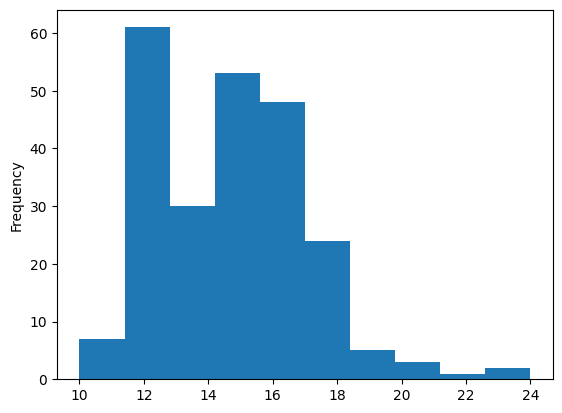

In [48]:
mpg.total.plot.hist()

In [49]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.4 MB/s eta 0:00:00


<Axes: title={'center': '히스토그램'}, ylabel='Frequency'>

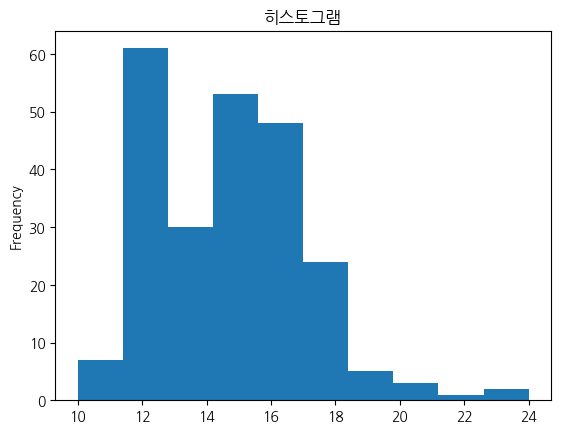

In [50]:
import koreanize_matplotlib

mpg['total'].plot(kind='hist',title='히스토그램')

<Axes: xlabel='total', ylabel='Count'>

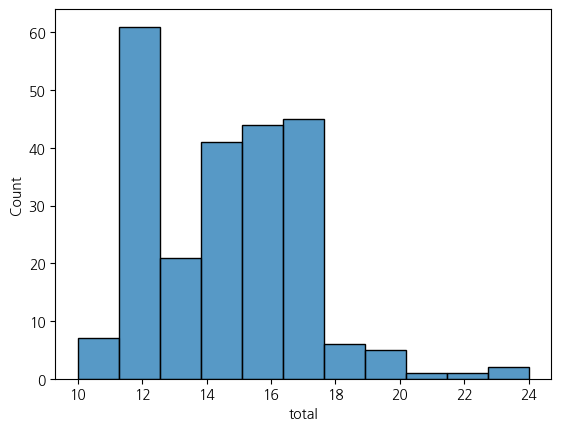

In [51]:
import seaborn as sns

sns.histplot(mpg, x="total")

In [55]:
import numpy as np

np.where(30>=5,'pass','fail')

array('pass', dtype='<U4')

In [57]:
np.where(mpg.total >= 20,'pass','fail')

array(['fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
      

In [59]:
mpg['test']=np.where(mpg.total >= 15,'pass','fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
118,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact,15.5,23.5,pass
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv,11.5,15.0,fail
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.0,10.5,fail
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup,12.0,13.5,fail
181,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize,17.5,26.0,pass


In [60]:
mpg.test.value_counts()

,count
test,
pass,127
fail,107


In [61]:
type(mpg.test.value_counts())

pandas.core.series.Series

<Axes: xlabel='test'>

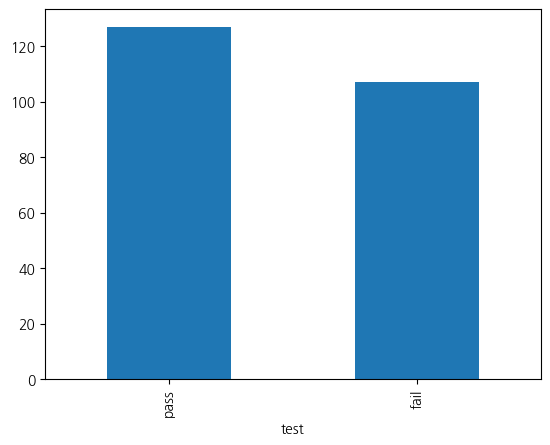

In [62]:
mpg.test.value_counts().plot.bar()

<Axes: xlabel='test'>

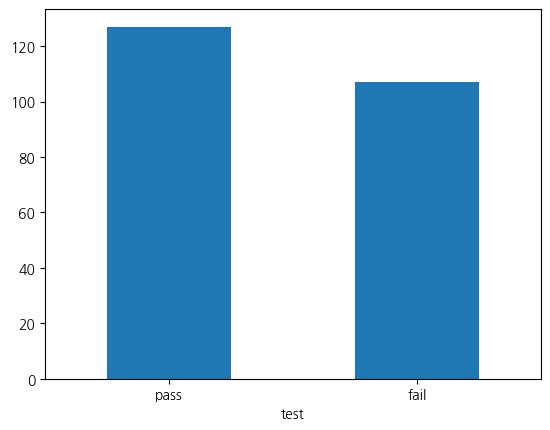

In [63]:
mpg.test.value_counts().plot.bar(rot=0)

<Axes: xlabel='test', ylabel='count'>

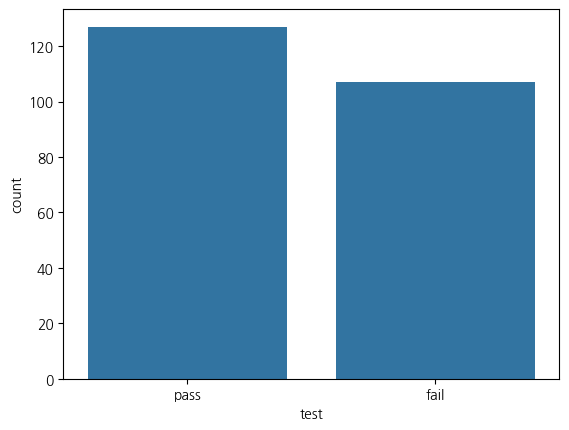

In [64]:
sns.countplot(mpg,x='test')

<Axes: xlabel='test', ylabel='count'>

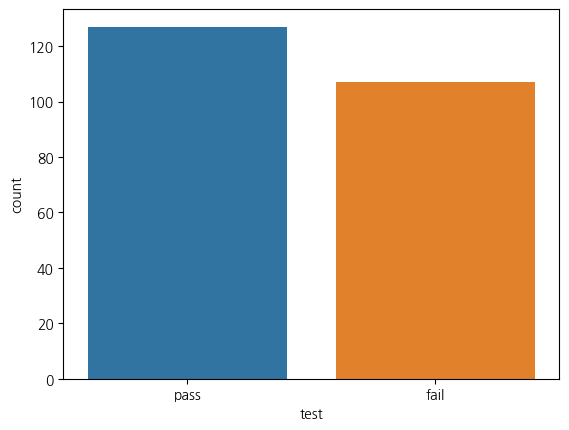

In [65]:
sns.countplot(mpg,x='test',hue='test')

<Axes: xlabel='test', ylabel='percent'>

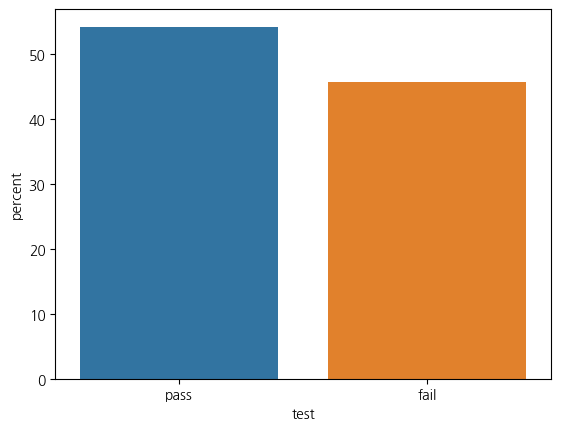

In [66]:
sns.countplot(mpg,x='test',hue='test',stat='percent')

<Axes: xlabel='test', ylabel='percent'>

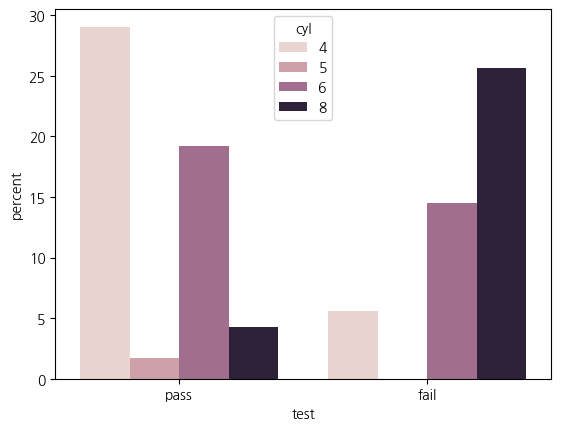

In [67]:
sns.countplot(mpg,x='test',hue='cyl',stat='percent')

<Axes: xlabel='test', ylabel='percent'>

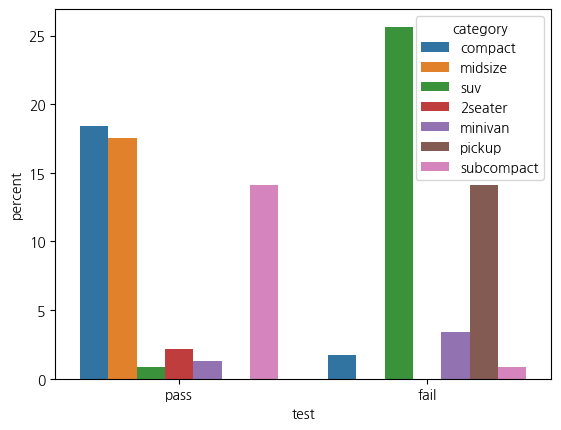

In [68]:
sns.countplot(mpg,x='test',hue='category',stat='percent')

In [70]:
np.where(mpg.total >= 30, 'A',np.where(mpg.total >= 20, 'B', 'C'))

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C

In [83]:
mpg['grade']=np.where(mpg.total >= 20, 'A',np.where(mpg.total >= 15, 'B', 'C'))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
52,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup,13.5,16.5,fail,C
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,15.0,20.5,pass,B
56,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup,11.5,13.0,fail,C
97,ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact,15.0,18.5,pass,B
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,15.0,19.5,pass,B


In [84]:
n_grade = mpg['grade'].value_counts()
n_grade

,count
grade,
B,121
C,107
A,6


<Axes: xlabel='grade'>

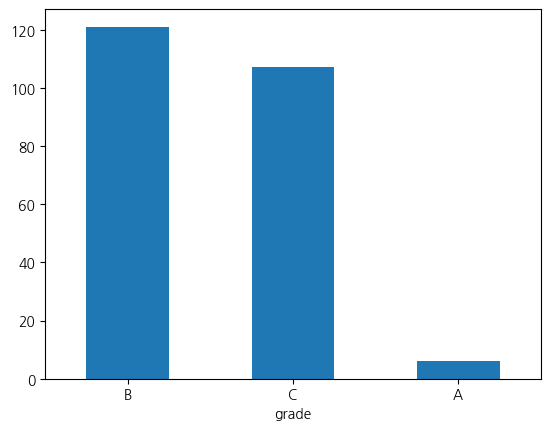

In [85]:
n_grade.plot.bar(rot = 0)

In [86]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,6
B,121
C,107


<Axes: xlabel='grade', ylabel='count'>

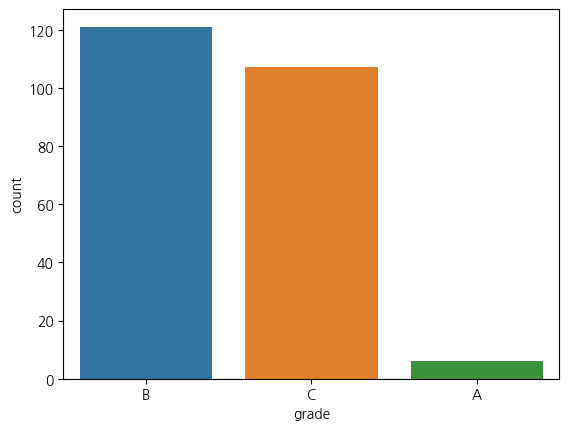

In [87]:
sns.countplot(mpg, x="grade", hue="grade")

<Axes: xlabel='grade', ylabel='percent'>

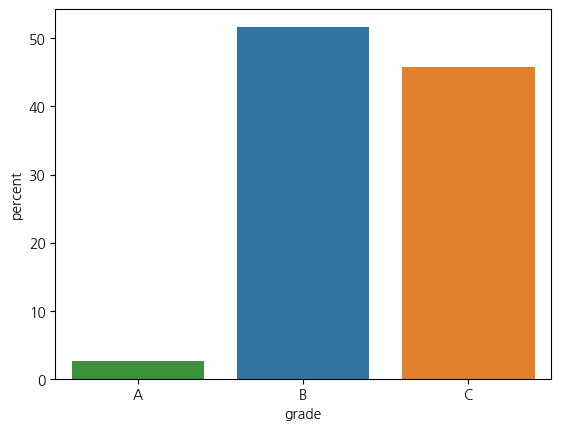

In [88]:
sns.countplot(mpg, x="grade", hue="grade", stat='percent', order=['A','B','C'])

In [89]:
mpg.grade.unique()

array(['B', 'C', 'A'], dtype=object)

In [90]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

<Axes: xlabel='grade', ylabel='percent'>

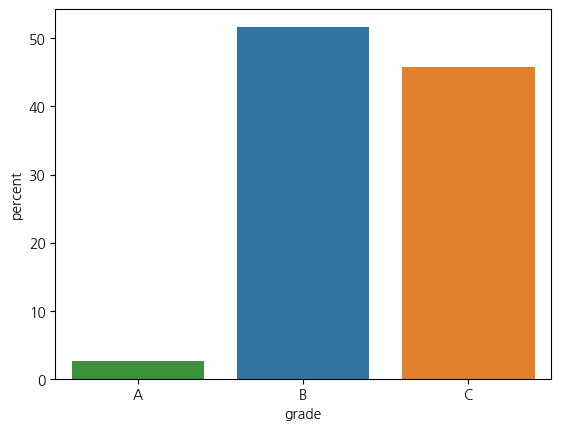

In [91]:
sns.countplot(mpg, x="grade", hue="grade", stat='percent', order=np.sort(mpg.grade.unique()))

## 메소드 체이닝

In [92]:
mpg.grade.value_counts()

,count
grade,
B,121
C,107
A,6


In [93]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,6
B,121
C,107


In [94]:
mpg.grade.value_counts().sort_index(ascending=False)

,count
grade,
C,107
B,121
A,6


In [96]:
mpg['grade2']=np.where(mpg.total >= 20, 'A',
              np.where(mpg.total >= 15, 'B',
              np.where(mpg.total >= 12, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv,11.5,15.5,fail,C,D
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,11.5,15.5,fail,C,D
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,15.0,20.5,pass,B,B
48,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup,12.5,17.0,fail,C,C
32,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize,15.5,23.0,pass,B,B


## 연산자 or, 메소드 isin

In [98]:
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')

mpg['size'].value_counts()

,count
size,
large,147
small,87


In [99]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')

mpg['size'].value_counts()

,count
size,
large,147
small,87


## 정리하기

In [103]:
import pandas as pd
import numpy as np

mpg = pd.read_csv('data/mpg.csv')

mpg.shape
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [104]:
mpg.tail()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [105]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [106]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [107]:
mpg = mpg.rename(columns={'manufacturer':'company'})

In [110]:
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')

<Axes: xlabel='test'>

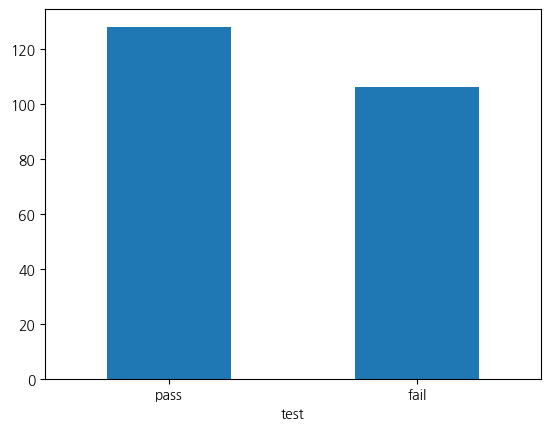

In [112]:
count_test = mpg['test'].value_counts()
count_test.plot.bar(rot = 0)

## 단원 06

In [113]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(5)

,id,nclass,math,english,science
13,14,4,48,87,12
1,2,1,60,97,60
15,16,4,58,98,65
0,1,1,50,98,50
19,20,5,78,83,58


In [114]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [115]:
exam.sample(6)

,id,nclass,math,english,science
6,7,2,80,90,45
16,17,5,65,68,98
7,8,2,90,78,25
1,2,1,60,97,60
18,19,5,89,68,87
10,11,3,65,65,65


In [117]:
exam.sample(frac=.2)

,id,nclass,math,english,science
16,17,5,65,68,98
11,12,3,45,85,32
7,8,2,90,78,25
10,11,3,65,65,65


In [118]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [119]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [120]:
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [121]:
exam[exam['nclass'] == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [122]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [123]:
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [124]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [125]:
exam[(exam.nclass == 1) & (exam.math >= 50)]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [126]:
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [127]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [128]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [129]:
exam[exam.nclass.isin([1, 3, 5])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [132]:
nclass1 = exam.query('nclass == 1')
nclass2 = exam.query('nclass == 2')

In [133]:
nclass1.math.mean()

np.float64(46.25)

In [134]:
nclass2.english.mean()

np.float64(84.25)

In [135]:
df = pd.DataFrame({'sex' : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [136]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [139]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [140]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [141]:
df.isin([0, 4])

,num_legs,num_wings
falcon,False,False
dog,True,True


In [142]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [143]:
exam.columns[2]

'math'

In [144]:
exam[exam.columns[2]]

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [147]:
exam[["math", 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98
4,25,80
5,50,89
6,80,90
7,90,78
8,20,98
9,50,98


## drop()

In [152]:
exam.drop(columns=['math', 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [153]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [154]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [155]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [156]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [157]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [158]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [159]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


## 정렬

In [161]:
exam.sort_index(ascending=False)

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65
14,15,4,75,56,78
13,14,4,48,87,12
12,13,4,46,98,65
11,12,3,45,85,32
10,11,3,65,65,65


In [162]:
exam.sort_values('math', ascending=False).head(5)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58


In [166]:
exam.sort_values(['nclass', 'math']).head(7)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [167]:
exam.sort_index()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [171]:
exam.sort_index(ascending=False)

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65
14,15,4,75,56,78
13,14,4,48,87,12
12,13,4,46,98,65
11,12,3,45,85,32
10,11,3,65,65,65


In [172]:
exam.sort_index(axis=1)

,english,id,math,nclass,science
0,98,1,50,1,50
1,97,2,60,1,60
2,86,3,45,1,78
3,98,4,30,1,58
4,80,5,25,2,65
5,89,6,50,2,98
6,90,7,80,2,45
7,78,8,90,2,25
8,98,9,20,3,15
9,98,10,50,3,45


## 종료